In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

In [3]:
copper0 = 8431   #Obecna wartość tony miedzi w USD

In [28]:
#Zabezpieczenie przed wzrostem ceny miedzi

forward = 8550   #cena wykonania kontraktu forward
prem = 100   #premia opcji sprzedaży

A2_0 = np.arange(8100, 8801, 100)   #Strategia 1 - podjęcie ryzyka
A2 = A2_0.tolist()
A2.append(copper0)
A2.sort()
X = np.array(A2)
Y = copper0 - X

B2 = [X[i] - forward for i in range(0, len(X))]   #Strategia 2 - zakup kontraktu forward z ceną wykonania 8550 USD

C2 = []   #Strategia 3 - zakup opcji sprzedaży z ceną wykonania 8431 USD i premią 100 USD
for value in A2:
    if value <= copper0:
        x = copper0 + prem
    else:
        x = value + prem
    C2.append(x)

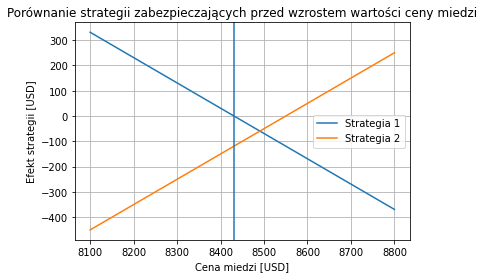

In [37]:
limes = [copper0 for j in range(0, len(A2))]

plt.plot(X,Y, label = "Strategia 1")
plt.plot(A2, B2, label = "Strategia 2")
#plt.plot(A2, C2, label = "Strategia 3")
#plt.plot(limes, A2, "--", label = "Wartość obecna")
plt.axvline(copper0)
plt.legend(loc = "best")
plt.title("Porównanie strategii zabezpieczających przed wzrostem wartości ceny miedzi")
plt.grid()
plt.xlabel("Cena miedzi [USD]")
plt.ylabel("Efekt strategii [USD]")
plt.show()

In [29]:
#Parametryzacja ceny wykonania kontraktu forward i premii opcji kupna

def forward_rise(x):   #Cena wykonania kontraktu forward wyrażona jako funkcja
    return x

def prem_buy(x):   #Premia opcji sprzedaży wyrażona jako funkcja
    return x

def strategies_rise(contract, option):   #Funkcja rysująca porównanie efektów strategii
    forward = forward_rise(contract)
    prem = prem_buy(option)
    
    A2_0 = np.arange(8000, 8901, 100)   
    A2 = A2_0.tolist()
    A2.append(copper0)
    A2.sort()

    B2 = [forward for i in range(0, len(A2))]   

    C2 = []  
    for value in A2:
        if value <= copper0:
            x = value + prem
        else:
            x = copper0 + prem
        C2.append(x)
    
    limes = [copper0 for j in range(0, len(A2))]

    plt.plot(A2, A2, label = "Strategia 1")
    plt.plot(A2, B2, label = "Strategia 2")
    plt.plot(A2, C2, label = "Strategia 3")
    plt.plot(limes, A2, "--", label = "Wartość obecna")
    plt.legend(loc = "best")
    plt.title("Porównanie strategii zabezpieczających przed wzrostem wartości ceny miedzi")
    plt.grid()
    plt.xlabel("Cena miedzi [USD]")
    plt.ylabel("Efekt strategii [USD]")
    plt.show()

In [10]:
interact(strategies_rise,
        contract = IntSlider(min = 8000, max = 8900, step = 50, value = 8550, description = "Cena wykonania kontraktu forward"),
        option = IntSlider(min = 0, max = 500, step = 10, value = 100, description = "Premia opcji kupna"))

interactive(children=(IntSlider(value=8550, description='Cena wykonania kontraktu forward', max=8900, min=8000…

<function __main__.strategies_rise(contract, option)>